1. first example of nn
2. what is tensor, data format underlying all DL
3. tensor operation building blocks of nn
4. how nn learn from data : gradient descnet

In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [7]:
train_labels.shape

(60000,)

In [8]:
test_images.shape

(10000, 28, 28)

build network

In [13]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

how to compile: optimizaion,loss, eval metrics

In [26]:
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

prepare data

In [16]:
train_images.shape

(60000, 28, 28)

In [17]:
train_images = train_images.reshape((60000,28*28))

In [18]:
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

In [22]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

fit data

In [27]:
network.fit(train_images, train_labels, nb_epoch=5, batch_size=128)

/home/ihong/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/5
60000/60000 [==============================] - 8s 136us/step - loss: 0.2555 - acc: 0.9271
Epoch 2/5
60000/60000 [==============================] - 8s 137us/step - loss: 0.1026 - acc: 0.9688
Epoch 3/5
60000/60000 [==============================] - 8s 134us/step - loss: 0.0676 - acc: 0.9798
Epoch 4/5
60000/60000 [==============================] - 8s 135us/step - loss: 0.0488 - acc: 0.9853
Epoch 5/5
60000/60000 [==============================] - 8s 135us/step - loss: 0.0370 - acc: 0.9887


evaluation network

In [28]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 97us/step


In [30]:
test_acc

0.97950000000000004

____

tensor?

In [31]:
import numpy as np 
x= np.array(12)
x

array(12)

In [32]:
x.ndim

0

In [34]:
x=np.array([1,2,3]) ## 3 dimension
print(x)
x.ndim ## one axis 

[1 2 3]


1

In [35]:
x=np.array([[1,2,3,1,0],[4,3,2,5,6],[1,2,3,4,5]])
x.shape

(3, 5)

In [36]:
x.ndim

2

In [37]:
x=np.array([[[1,2,3,4,5],[1,2,3,4,1],[2,3,1,1,1]]])

In [40]:
x.shape

(1, 3, 5)

In [39]:
x.ndim

3

back to nn train_images

In [45]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [46]:
print(train_images.shape)

(60000, 28, 28)


In [47]:
print(train_images.ndim)

3


In [48]:
print(train_images.dtype)

uint8


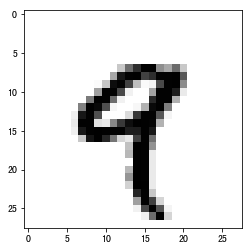

In [50]:
digit = train_images[4]

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(digit,cmap=plt.cm.binary)

In [51]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


notion of data batch

In [53]:
batch = train_images[:128]
# nth batch
n=5
batch = train_images[128*n:128*(n+1)]

Real world data

- vector data: 2D tensor of shape (samples, features)
- time series, sequential data: 3D (samples, timesteps, features)
- images: 4D tensor of shape (samples,width,height,channel) or (samples, channels, width, height)
- video :5D (samples, frames, width, height, channel)

relu operation -- element wise

In [56]:
def naive_relu(x):
    assert len(x.shape)==2
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j]  = max(x[i,j],0)
            
    return x

(array([   1.,    2.,   11.,   15.,   28.,   55.,   62.,  100.,  124.,
         114.,  116.,  118.,   88.,   57.,   58.,   26.,   12.,    7.,
           5.,    1.]),
 array([-0.30904302, -0.27760079, -0.24615855, -0.21471632, -0.18327408,
        -0.15183185, -0.12038961, -0.08894738, -0.05750514, -0.02606291,
         0.00537933,  0.03682156,  0.0682638 ,  0.09970603,  0.13114826,
         0.1625905 ,  0.19403273,  0.22547497,  0.2569172 ,  0.28835944,
         0.31980167]),
 <a list of 20 Patch objects>)

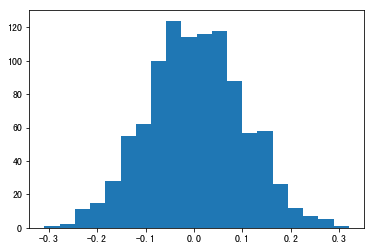

In [71]:
## element-wise relu 
mu,sigma = 0,0.1
x = np.random.normal(0,0.1,1000)
x1 = np.maximum(x,0)
# x.shape
plt.hist(x,20)

# broadcasting

What happen with addition when the shape of two shape of tensor been added differ?

1. axes are added to smaller tensor to match the `ndim` of larger tensor
2. the smaller tensor is then repeated alongside these new axes

In [72]:
def naive_add_matrix_and_vector(x,y):
    # x is 2D np array
    # y is np vector
    assert len(x.shape)==2
    assert len(y.shape)==1
    assert x.shape[1] == y.shape[0]
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] += y[j]
            
    return x

In [79]:
x = np.array([[2,3,4,5,1],[1,2,3,4,5],[3,3,3,1,1]])
y = np.array([1,2,3,4,5])

x+y == naive_add_matrix_and_vector(x,y)
# naive_add_matrix_and_vector

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]], dtype=bool)

In [84]:
x = np.random.random((64,3,32,10))
y = np.random.random((32,10))

print((x+y).shape)

z = np.maximum(x,y)
print(z.shape)

(64, 3, 32, 10)
(64, 3, 32, 10)


tensor dot product

(a,b,c,d) . (d,) (a,b,c)

(a,b,c,d) . (d,e) (a,b,c,e)
...

tensor reshape

In [85]:
x=np.array([[0,1],
           [2,3],
           [4,5]])
print(x.shape)

(3, 2)


In [88]:
x.reshape((6,1))

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [89]:
x.reshape((2,3))

array([[0, 1, 2],
       [3, 4, 5]])